-Graphics3D-
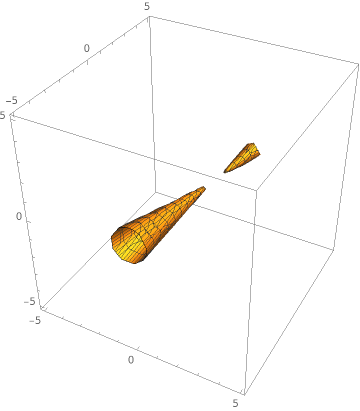

In [1]:
fSRC[x_,y_,z_] := 11*x^2 - 2*x*y - 2*x*z + 2*y*z + 9*z^2 - 4*x + y + z;
ContourPlot3D[fSRC[x,y,z] == 0, {x,-5,5}, {y,-5,5}, {z, -5, 5}]

11   -1   -1

-1   0    1

-1   1    9
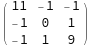

In [3]:
A = {
    {11, -1, -1},
    {-1, 0, 1},
    {-1, 1, 9}
};
a = {-2, 1/2, 1/2};
MatrixForm[A]

11 - l   -1       -1

-1       -l       1

-1       1        9 - l
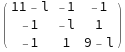

In [6]:
l = .;
AE = A - IdentityMatrix[3]*l;
MatrixForm[AE]

In [9]:
(* Сравнение характеристического уравнения*)
myCharPoly = Det[AE];
wCharPoly = CharacteristicPolynomial[A,l];
FullSimplify[myCharPoly == wCharPoly]

True

In [19]:
(* Сравнение корней характеристического уравнения*)
sols = Solve[myCharPoly == 0, l];
myEigenVals = l /. sols;
wEigenVals = Eigenvalues[A];
myEigenVals == Sort[wEigenVals]

True
{11.5631, 8.61753, -0.18064}

In [31]:
(* Сравнение собственных векторов *)
myEigenVectors = {};
For[i = 1, i < 4, i++,
    X = {x,y,z};
    myD = AE /. l ->myEigenVals[[i]];
    myZ = myD.X;
    myEigenV = Solve[myZ == 0 /. z->1];
    myEigenVectors = Append[myEigenVectors, {x,y,1} /. myEigenV[[1]]];
]
wEigenVectors = Eigenvectors[A];
Sort[N[myEigenVectors]] == Sort[N[wEigenVectors]]

True

-0.0798259   -0.991846    0.0993417

0.407145     0.0585251    0.911487

-0.909869    0.113207     0.399153
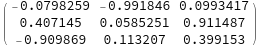

In [23]:
(* Нормализация матрицы *)
(* Я сразу определяю транспонированную матрицу, так как в матрицу легче добавлять строки, а не столбцы *)
myTransposedNormMatrix = {Normalize[myEigenVectors[[1]]],
    Normalize[myEigenVectors[[2]]],
    Normalize[myEigenVectors[[3]]]};
N[myTransposedNormMatrix] // MatrixForm

-Graphics3D-
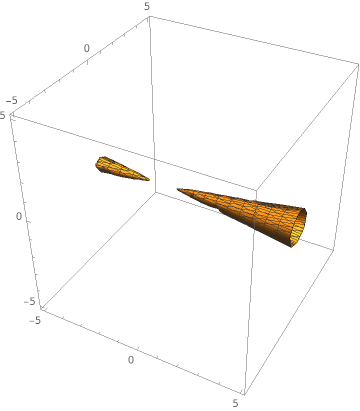

In [27]:
a1 = myTransposedNormMatrix.a;
p = myEigenVals[[1]]*x1^2 + myEigenVals[[2]]*y1^2 + myEigenVals[[3]]*z1^2 + 2*a1[[1]]*x1 + 2*a1[[2]]*y1 + 2*a1[[3]]*z1;
p = FullSimplify[p];

fRES[a_,b_,c_]:= p /.{x1->a, y1->b, z1->c};
ContourPlot3D[fRES[x,y,z] == 0, {x,-5,5}, {y,-5,5}, {z, -5, 5}]